<a href="https://colab.research.google.com/github/aryacodez/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                    **Credit Card Fraud Detection**

## **Things To Gather / Find From Dataset**
0. Remove Outliers and Fix Missing Data if present
1. Fraud vs Non Fraud rate
2. Check the frequency of Time of Fraud and Non-Fraud transactions happen
3. Check The Amount Range also
4. Check The Transaction Weightage
5. Which Factor is major cause of Fraud
6. Find Which Factor are highly Co - related
7. Scale The Datasets
8. Predict using suitable Model
9. If Possible Deploy the Model

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/creditcard.csv'
df = pd.read_csv(path,header = 0)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.sample(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
261900,160232.0,2.103815,-0.430247,-1.756160,-1.440195,-0.167507,-1.737122,0.367717,-0.492897,1.549670,-0.867988,-0.711415,0.675911,-0.186562,0.505183,0.644344,-1.011847,-0.049082,-0.528909,1.044160,-0.184627,-0.127050,-0.164425,0.116189,-0.083953,0.131677,-0.308293,-0.033888,-0.062167,25.07,0
147897,89144.0,-0.279118,0.788276,0.599579,-0.294741,1.071926,-0.228344,0.972646,-0.287781,-0.506449,-0.014654,1.041155,0.361990,-0.159727,0.444006,0.446416,-0.620590,-0.457859,0.644877,1.055125,0.063613,0.337040,1.158516,-0.440400,0.758028,0.065661,-0.034818,-0.148982,-0.088272,0.89,0
264199,161315.0,2.088417,0.245534,-1.742123,0.368394,0.601608,-0.762918,0.264329,-0.295969,0.319310,-0.413563,-0.498708,0.746536,1.316603,-1.097758,0.082138,0.304432,0.346636,-0.407155,0.103767,-0.073976,-0.361283,-0.872705,0.306461,0.412418,-0.195516,0.177325,-0.054748,-0.029540,0.99,0
57822,48091.0,-1.597754,-0.266872,3.157944,-0.355280,-1.062280,0.289359,-0.587351,0.471954,1.701661,-0.837786,-1.508119,0.528801,-0.032517,-1.592665,-1.850704,-0.199726,0.189259,-0.198219,-0.025874,0.285196,0.015793,0.602724,-0.264010,0.525680,0.450118,1.201244,0.367255,0.275114,67.50,0
234461,147983.0,2.243920,-0.782515,-1.710440,-1.351496,0.151678,0.065681,-0.584030,-0.073198,-0.710114,1.005092,0.259726,-0.080521,0.689355,0.026402,-0.160767,1.446411,-0.507978,-0.581642,1.042695,0.062365,0.341496,0.943370,-0.039488,-0.305496,0.187464,-0.023139,-0.035376,-0.073724,14.84,0
73236,55043.0,-1.262064,0.143697,1.573781,0.584046,-1.209855,-0.149244,0.344958,0.589257,0.215934,-1.032748,-1.394927,-0.596193,-1.385543,0.250193,0.041291,0.649214,-0.440884,0.609052,-1.048963,0.098174,0.402743,0.670773,0.339853,0.334455,-0.249881,-0.463533,-0.004650,0.088399,198.00,0
65896,51795.0,-2.920348,-4.653283,0.369288,0.398617,-3.537493,2.322691,2.927559,0.125220,-1.179214,-0.692645,0.645028,-0.367228,-0.070809,-0.492151,-0.654434,0.507719,0.899576,-0.512563,1.785406,3.215822,0.999373,0.541940,3.065074,-0.423816,0.010252,-0.188201,-0.257743,0.251188,1273.62,0
121108,76074.0,-2.227912,-1.389524,2.305398,-0.435731,0.726079,-1.107613,-0.460700,0.331396,0.589541,-0.757117,0.651752,0.593765,-1.012317,-0.283974,-1.608881,0.911662,-0.990377,0.307092,-1.294119,-0.403176,0.034647,0.267517,0.952185,0.518489,-0.135610,-0.053286,0.036619,0.147403,5.75,0


**1. Features V1, V2, … V28 are the principal components obtained with PCA, <br>**
**2. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.<br>**
**3. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.<br>** **4. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [ ]:
df.skew(axis = 0,skipna = True)

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


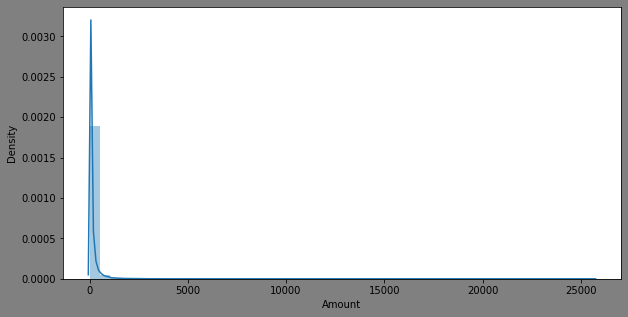

In [ ]:
plt.figure(figsize=(10,5),facecolor ='gray')
sns.distplot(df['Amount'],norm_hist=True)

In [ ]:
df['Class'].unique()

array([0, 1])

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


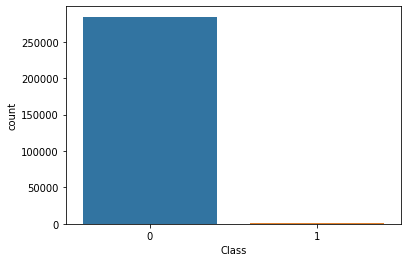

In [ ]:
sns.countplot(df['Class'])

In [ ]:
total_non_fraud = ((df['Class'].value_counts()[0])/(len(df['Class'])))*100
total_fraud = ((df['Class'].value_counts()[1])/(len(df['Class'])))*100
print('Percentage of Non-Fraud :',round(total_non_fraud,4),"%"," & Total Non-Fraud Occured :" ,df['Class'].value_counts()[0])
print('Percentage of Fraud :',round(total_fraud,4),"%"," & Total Fraud Occured :" ,df['Class'].value_counts()[1])

Percentage of Non-Fraud : 99.8273 %  & Total Non-Fraud Occured : 284315
Percentage of Fraud : 0.1727 %  & Total Fraud Occured : 492


*From the above Percentage we can clearly see that this is an unbalanced Data*

**Checking the frequency of Time of Fraud and Non-Fraud transactions happen**

In [ ]:
fraud = df.loc[df.Class == 1]
non_fraud = df.loc[df.Class == 0]

In [ ]:
non_fraud.shape,fraud.shape

((284315, 31), (492, 31))

In [ ]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
fraud["Amount"].min()

0.0

In [ ]:
fraud["Amount"].max()

2125.87

In [ ]:
round(fraud["Amount"].mean(),4)

122.2113

In [ ]:
fraud["Range_Amount"] = pd.cut(fraud["Amount"], bins = [0,400,800,1200,1600,2000,2400],
                               labels = ['0 to 400','401 to 800','801 to 1200','1201 to 1600','1601 to 2000','2001 to 2400'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Range_Amount
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,NaN
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,401 to 800
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,0 to 400
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,0 to 400
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,0 to 400


In [ ]:
fraud["Range_Amount"].value_counts()

0 to 400        423
401 to 800       28
1201 to 1600      6
801 to 1200       6
2001 to 2400      1
1601 to 2000      1
Name: Range_Amount, dtype: int64

Text(0.5, 1.0, 'Frequency Range of Amount involved in Fraud')

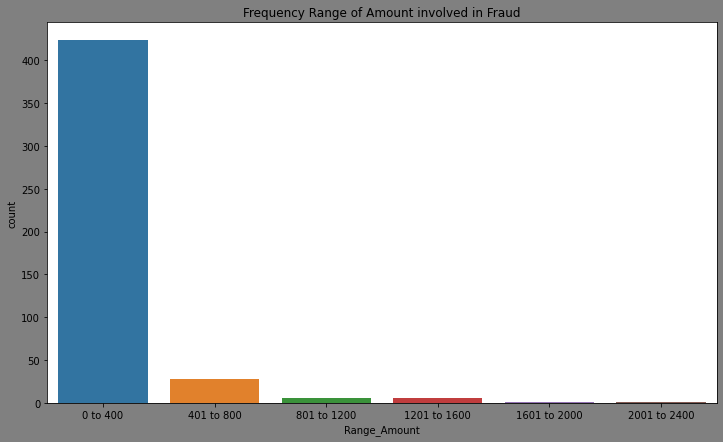

In [ ]:
plt.figure(figsize=(12,7),facecolor ='gray')
sns.countplot(x = fraud["Range_Amount"])
plt.title("Frequency Range of Amount involved in Fraud")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time At which Maximum fraud taken place in seconds')

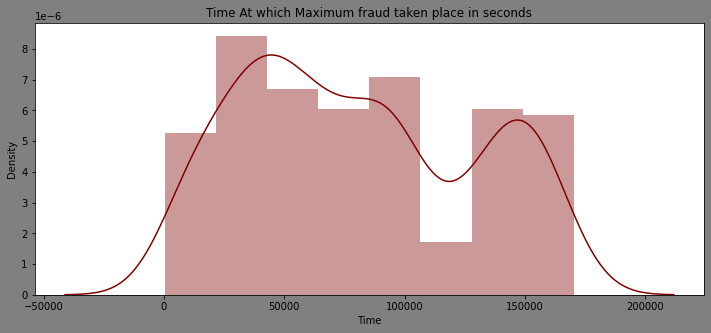

In [ ]:
plt.figure(figsize=(12,5),facecolor ='gray')
sns.distplot(fraud["Time"],color = 'maroon')
plt.title("Time At which Maximum fraud taken place in seconds")

In [ ]:
fraud["Time"].describe()

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [ ]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


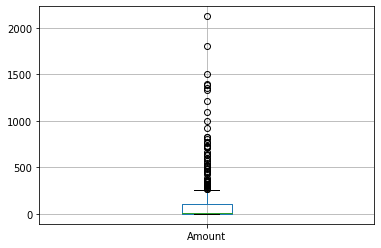

In [ ]:
fraud.boxplot("Amount")

In [ ]:
non_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
non_fraud["Amount"].min()

0.0

In [ ]:
non_fraud["Amount"].max()

25691.16

In [ ]:
round(non_fraud["Amount"].mean(),4)

88.291

In [ ]:
non_fraud["Amount"].value_counts()

1.00       13575
1.98        6044
0.89        4872
9.99        4746
15.00       3280
           ...  
1814.33        1
243.99         1
653.92         1
719.61         1
635.57         1
Name: Amount, Length: 32701, dtype: int64

In [ ]:
non_fraud["Range_Amt"] = pd.cut(non_fraud["Amount"],bins = [0,1500,3000,4500,6000,7500,9000,10500,12000,13500],
                                labels = ['0 to 1500','1501 to 3000','3001 to 4500','4501 to 6000','6001 to 7500','7501 to 9000','9001 to 10500'
                                         ,'10501 to 12000','12001 to 13500'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
non_fraud["Range_Amt"].value_counts()

0 to 1500         281186
1501 to 3000        1047
3001 to 4500         207
4501 to 6000          45
6001 to 7500          13
7501 to 9000          11
10501 to 12000         2
9001 to 10500          2
12001 to 13500         1
Name: Range_Amt, dtype: int64

Text(0.5, 1.0, 'Frequency Range of Amount involved in NoN-Fraud')

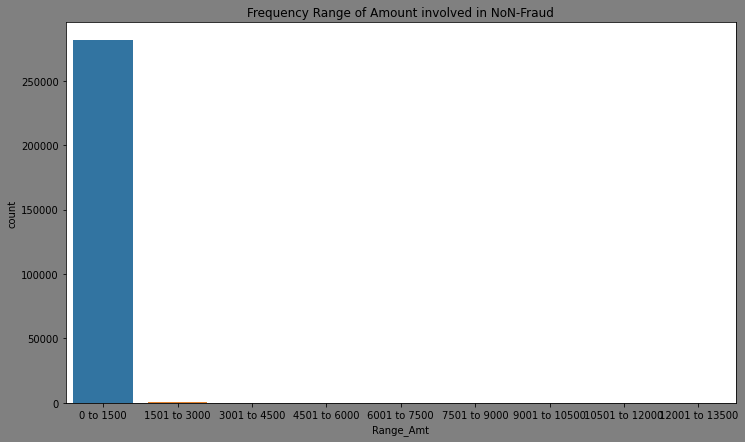

In [ ]:
plt.figure(figsize=(12,7),facecolor ='gray')
sns.countplot(x = non_fraud["Range_Amt"])
plt.title("Frequency Range of Amount involved in NoN-Fraud")

In [ ]:
non_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Time At which Maximum fraud taken place in seconds')

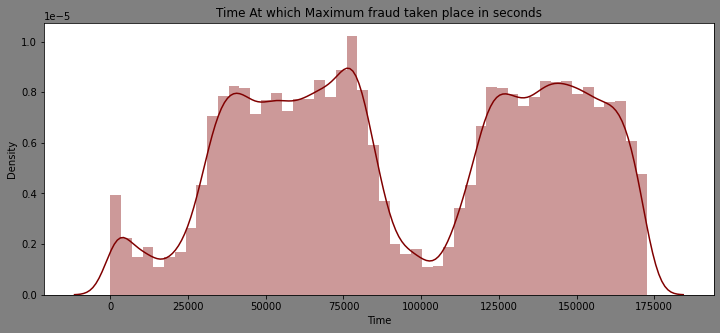

In [ ]:
plt.figure(figsize=(12,5),facecolor ='gray')
sns.distplot(non_fraud["Time"],color = 'maroon')
plt.title("Time At which Maximum fraud taken place in seconds")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor 

<Figure size 432x288 with 0 Axes>

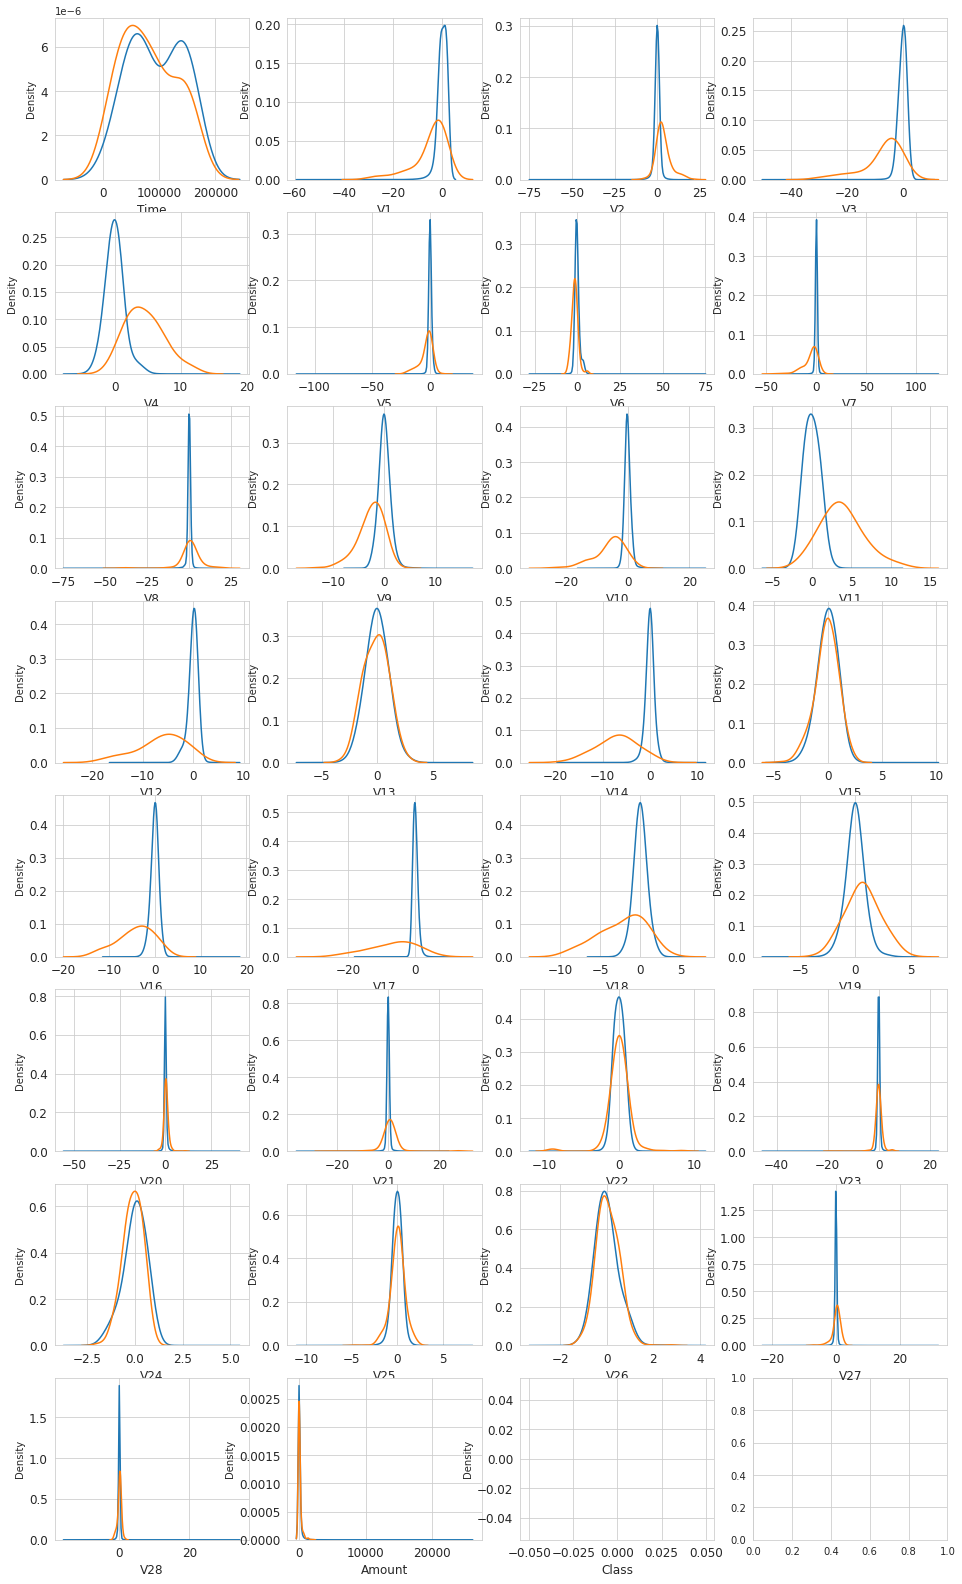

In [ ]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

**Conclusion Upto This Point :-**
1. Maximum Fraud Transaction occured was 2125.87 .
2. Average Fraud Transaction occured was 122.2113 .
3. From the amount range and graph in fraud transaction its been conclude that transaction for all these fraud cases took placed    in small amounts.
4. All these fraud transaction have taken place at particular time .

5. Non-Fraud Transaction did'nt occur when there were large value of amount .
6. For Non-Fraud Cases Amount Q3,Q2 and Q1 are comparatively higher than Fraud Cases Amount
7. It's also been noticed that for Non-Fraud Transaction the TIME distribution has wider range compare to Fraud Transaction        cases where Time is certainly restricted with a time-space.
8. Factor's V's - Some are clearly distict in Class 0 and Class 1, Some looks similar to each other for two classes and Some are partially distributed for two classes.
9. Class 1 i.e fraud transaction is higly skewed to one side

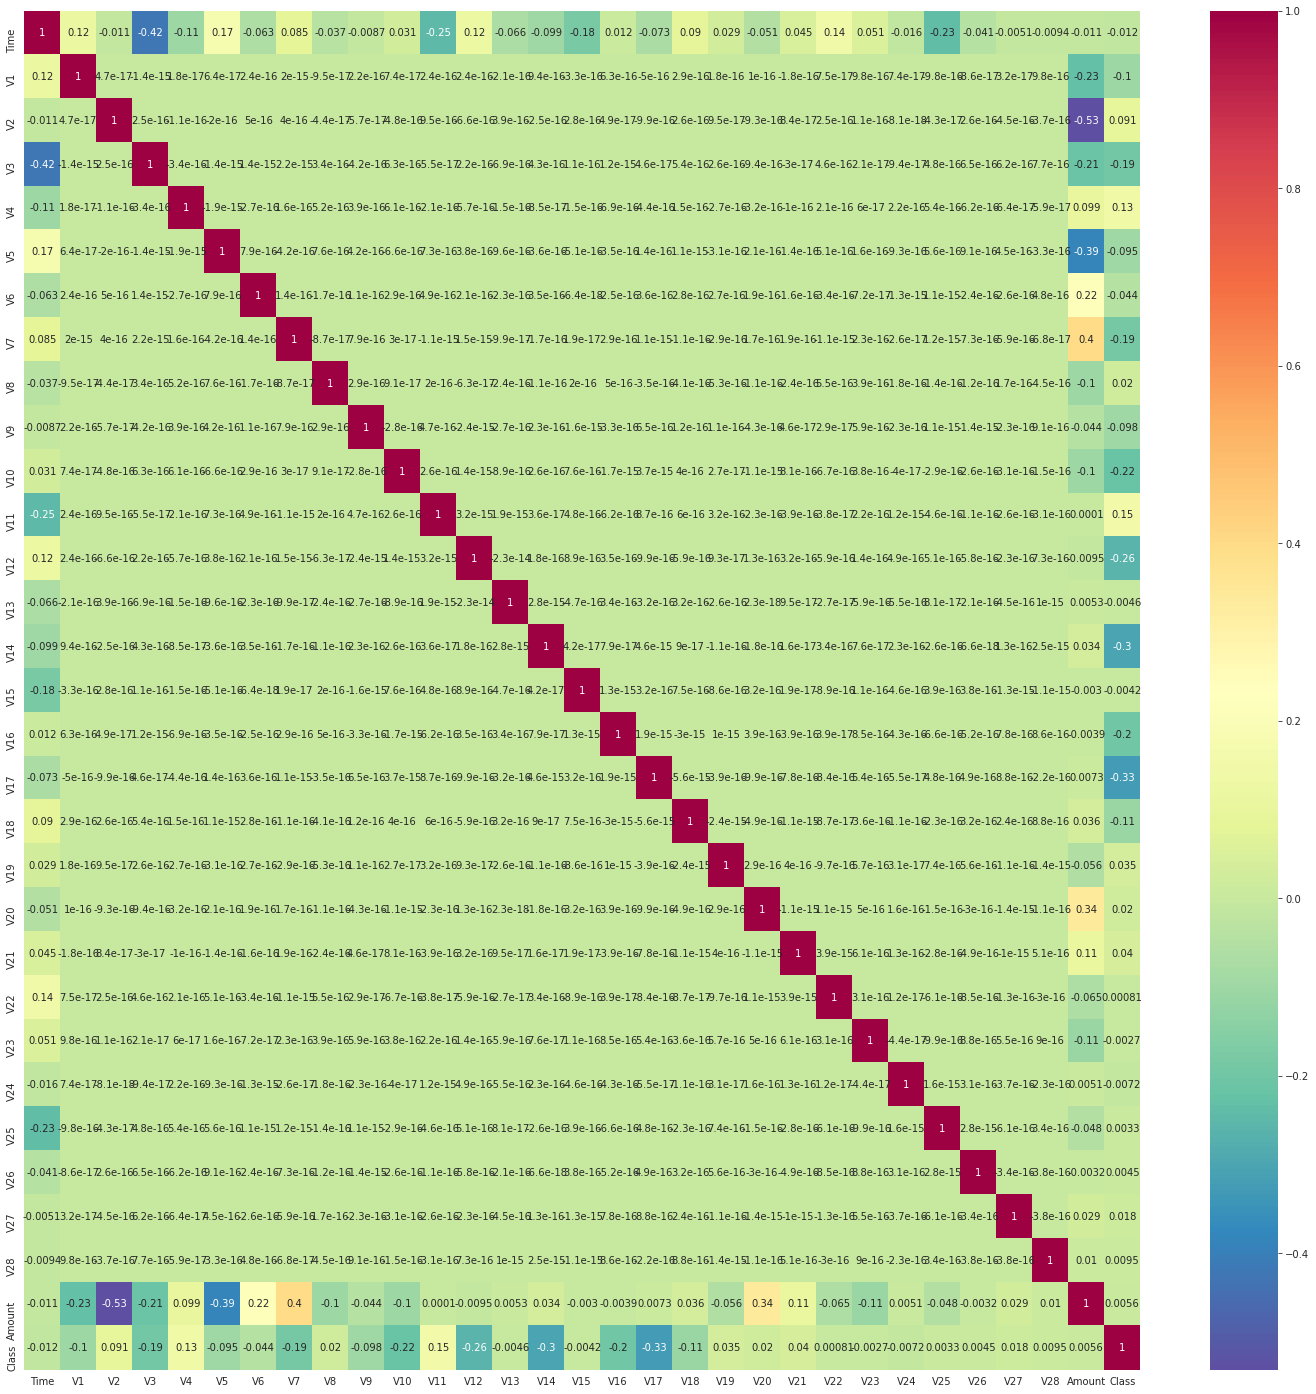

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot = True,cmap = 'Spectral_r')

There are High Correlations Between :-
1. Time and V3 (-0.42)
2. V2 and Amount (-0.53)
3. Amount and V5 (-0.39)

**But these will not lead to multicollinearity**/

# MODEL PREDICTION

**TRAINING AND TESTING**

In [ ]:
X = df.loc[:,df.columns != "Class"]
y = df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 50)

In [ ]:
print("X_train : ",X_train.shape," Y_train : ",y_train.shape)
print("X_test  : ",X_test.shape,"  Y_test  : ",y_test.shape)

X_train :  (227845, 30)  Y_train :  (227845,)
X_test  :  (56962, 30)   Y_test  :  (56962,)


Standard Scaling

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [ ]:
X_train_s = scaler.transform(X_train)

In [ ]:
X_test_s = scaler.transform(X_test)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrs = LogisticRegression()

In [ ]:
lrs.fit(X_train_s,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ylrspre = lrs.predict(X_test_s)

In [ ]:
print("Intercept : ",lrs.intercept_," Coefficient : ",lrs.coef_)

Intercept :  [-8.60268457]  Coefficient :  [[-0.13453004  0.27728422 -0.04010305  0.03879737  1.0074794   0.14179512
  -0.15514188 -0.13977063 -0.20987234 -0.30231609 -0.99553664  0.03620267
  -0.06162926 -0.21386738 -0.454921   -0.11411597 -0.11855651 -0.036015
  -0.05623649  0.03845629 -0.37623368  0.26410128  0.31306547 -0.04270132
   0.09086568 -0.06317429 -0.01893407 -0.35658169 -0.10282154  0.1931517 ]]


In [ ]:
prepro = (lrs.predict_proba(X_test_s)[:,1] >= 0.2)
prepro[:15]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,roc_auc_score,confusion_matrix,roc_curve

In [ ]:
print(classification_report(y_test,prepro))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.73      0.76      0.74        88

    accuracy                           1.00     56962
   macro avg       0.86      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test,prepro)

0.9991924440855307

In [ ]:
precision_score(y_test,prepro)

0.7282608695652174

In [ ]:
recall_score(y_test,prepro)

0.7613636363636364

In [ ]:
roc_auc_score(y_test,prepro)

0.8804620340977023

In [ ]:
cnf = confusion_matrix(y_test,prepro)
cnf

array([[56849,    25],
       [   21,    67]])

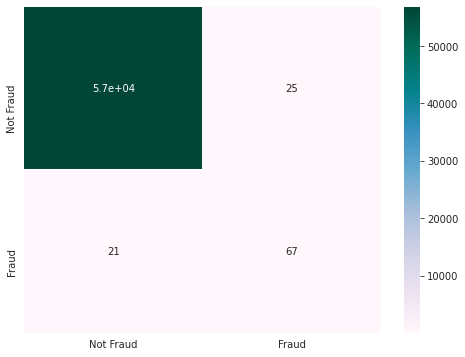

In [ ]:
plt.figure(figsize=(8,6))
labels = ["Non-Fraud","Fraud"]
sns.heatmap(cnf,xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],annot = True,cmap='PuBuGn')

In [ ]:
fpr, tpr, thr = roc_curve(y_test,prepro)

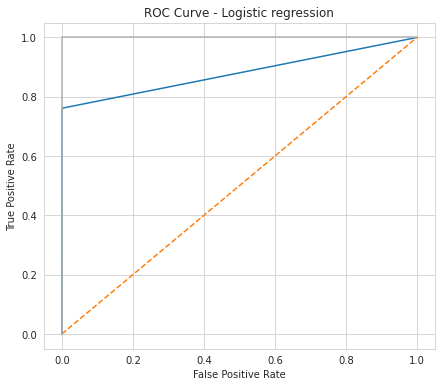

In [ ]:
plt.subplots(1, figsize=(7,6))   
plt.title('ROC Curve - Logistic regression')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("True Positive  : ",cnf[0][0])
print("False Positive : ",cnf[0][1])
print("False Negative : ",cnf[1][0])
print("True Negative  : ",cnf[1][1])

True Positive  :  56849
False Positive :  25
False Negative :  21
True Negative  :  67


**From Logistic Regression we found that**
1. Precision Score = 72.83%
2. Recall Score = 76.13%
3. Roc_Auc Score = 88.05%
4. F1 Score = 74%

# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train_s,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
ylda = lda.predict(X_test_s)

In [ ]:
ldapro = (lda.predict_proba(X_test_s)[:,1] >= 0.2)

In [ ]:
print(classification_report(y_test,ldapro))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.77      0.73      0.75        88

    accuracy                           1.00     56962
   macro avg       0.89      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test,ldapro)

0.9992451107756047

In [ ]:
precision_score(y_test,ldapro)

0.7710843373493976

In [ ]:
recall_score(y_test,ldapro)

0.7272727272727273

In [ ]:
roc_auc_score(y_test,ldapro)

0.8634693277324357

In [ ]:
ldacnf = confusion_matrix(y_test,ldapro)

In [ ]:
ldacnf

array([[56855,    19],
       [   24,    64]])

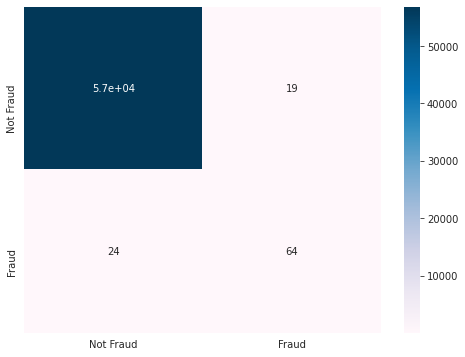

In [ ]:
plt.figure(figsize=(8,6))
labels = ["Non-Fraud","Fraud"]
sns.heatmap(ldacnf,xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],annot = True,cmap='PuBu')

In [ ]:
fpr1, tpr1, thr1 = roc_curve(y_test,ldapro)

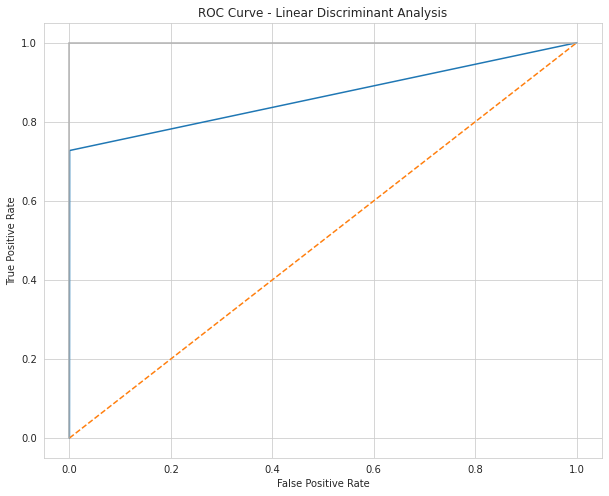

In [ ]:
plt.subplots(1, figsize=(10,8))   
plt.title('ROC Curve - Linear Discriminant Analysis')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("True Positive  : ",ldacnf[0][0])
print("False Positive : ",ldacnf[0][1])
print("False Negative : ",ldacnf[1][0])
print("True Negative  : ",ldacnf[1][1])

True Positive  :  56855
False Positive :  19
False Negative :  24
True Negative  :  64


**From Linear Discriminant Analysis we found that**

1. Precision Score = 77.11%  -->  77% model predict that people has'nt been frauded
2. Recall Score = 72.72%     -->  73% model predict the values correctly
3. Roc_Auc Score = 86.35%    -->  This model is 86% capable of distinguishing between 0's and 1's
4. F1 Score = 75%

# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_knn1 = KNeighborsClassifier(n_neighbors = 3)
clf_knn1.fit(X_train_s,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
preknn = clf_knn1.predict(X_test_s)

In [ ]:
knnpro = (clf_knn1.predict_proba(X_test_s)[:,1] >= 0.2)

In [ ]:
print(classification_report(y_test,knnpro))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.63      0.82      0.71        88

    accuracy                           1.00     56962
   macro avg       0.81      0.91      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test,knnpro)

0.9989642217618764

In [ ]:
precision_score(y_test,knnpro)

0.6260869565217392

In [ ]:
recall_score(y_test,knnpro)

0.8181818181818182

In [ ]:
roc_auc_score(y_test,knnpro)

0.9087128804662301

In [ ]:
knncnf = confusion_matrix(y_test,knnpro)

In [ ]:
knncnf

array([[56831,    43],
       [   16,    72]])

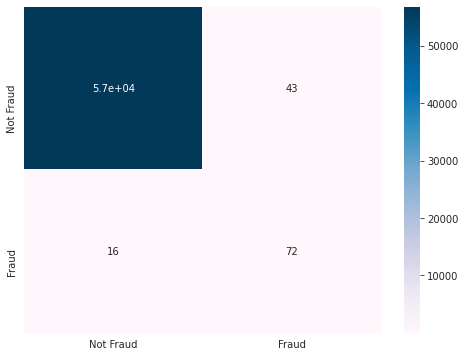

In [ ]:
plt.figure(figsize=(8,6))
labels = ["Non-Fraud","Fraud"]
sns.heatmap(knncnf,xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],annot = True,cmap='PuBu')

In [ ]:
fpr2, tpr2, thr2 = roc_curve(y_test,knnpro)

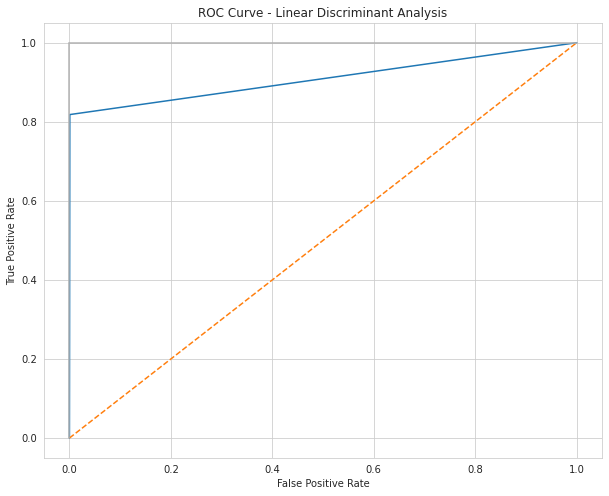

In [ ]:
plt.subplots(1, figsize=(10,8))   
plt.title('ROC Curve - Linear Discriminant Analysis')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("True Positive  : ",knncnf[0][0])
print("False Positive : ",knncnf[0][1])
print("False Negative : ",knncnf[1][0])
print("True Negative  : ",knncnf[1][1])

True Positive  :  56831
False Positive :  43
False Negative :  16
True Negative  :  72


**From KNearest Classifier we found that**

1. Precision Score = 62.61%

2. Recall Score = 81.81%

3. Roc_Auc Score = 90.87%

4. F1 Score = 71%



# DECISION TREE

In [ ]:
from sklearn import tree

In [ ]:
treeclf = tree.DecisionTreeClassifier(max_depth = 6,min_samples_split = 3,criterion='entropy',min_samples_leaf = 10)

In [ ]:
treeclf.fit(X_train_s,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
treeclf.predict(X_test_s)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
treepro = (treeclf.predict_proba(X_test_s)[:,1] >= 0.2)

In [ ]:
print(classification_report(y_test,treepro))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.82      0.84      0.83        88

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test,treepro)

0.9994733330992591

In [ ]:
precision_score(y_test,treepro)

0.8222222222222222

In [ ]:
recall_score(y_test,treepro)

0.8409090909090909

In [ ]:
roc_auc_score(y_test,treepro)

0.9203138836407113

In [ ]:
treecnf =  confusion_matrix(y_test,treepro)

In [ ]:
treecnf

array([[56858,    16],
       [   14,    74]])

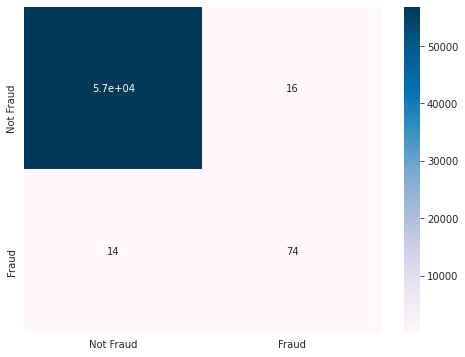

In [ ]:
plt.figure(figsize=(8,6))
labels = ["Non-Fraud","Fraud"]
sns.heatmap(treecnf,xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],annot = True,cmap='PuBu')

In [ ]:
fpr3, tpr3, thr3 = roc_curve(y_test,treepro)

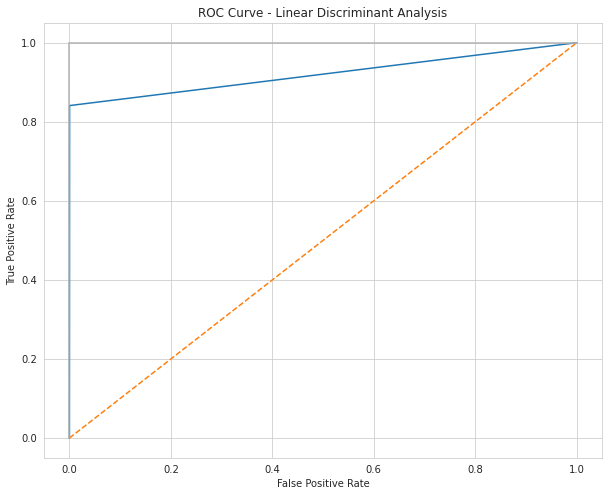

In [ ]:
plt.subplots(1, figsize=(10,8))   
plt.title('ROC Curve - Linear Discriminant Analysis')
plt.plot(fpr3, tpr3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("True Positive  : ",treecnf[0][0])
print("False Positive : ",treecnf[0][1])
print("False Negative : ",treecnf[1][0])
print("True Negative  : ",treecnf[1][1])

True Positive  :  56858
False Positive :  16
False Negative :  14
True Negative  :  74


#From Decision Tree we found that


1. Precision Score = 82.22%

2. Recall Score = 84.09%

3. Roc_Auc Score = 92.03%
4. F1 - score = 83%


# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBClassifier(max_depth = 7,n_estimators = 2500,learning_rate=0.2,n_jobs=-1)

In [ ]:
%%time
xg.fit(X_train_s,y_train)

CPU times: user 24min 1s, sys: 817 ms, total: 24min 1s
Wall time: 12min 11s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=2500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xg.predict(X_test_s)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
xgpro = (xg.predict_proba(X_test_s)[:,1] >= 0.2)

In [ ]:
print(classification_report(y_test,xgpro))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.95      0.78      0.86        88

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
accuracy_score(y_test,xgpro)

0.9995962220427653

In [ ]:
precision_score(y_test,xgpro)

0.9452054794520548

In [ ]:
recall_score(y_test,xgpro)

0.7840909090909091

In [ ]:
roc_auc_score(y_test,xgpro)

0.8920102890919961

In [ ]:
xgcnf = confusion_matrix(y_test,xgpro)

In [ ]:
xgcnf

array([[56870,     4],
       [   19,    69]])

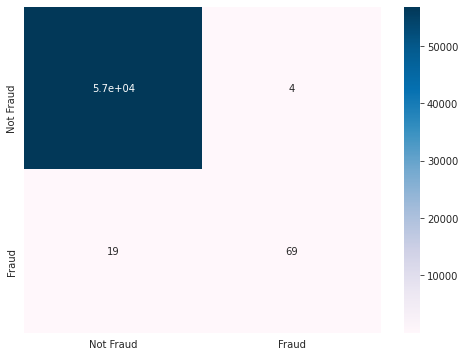

In [ ]:
plt.figure(figsize=(8,6))
labels = ["Non-Fraud","Fraud"]
sns.heatmap(xgcnf,xticklabels=['Not Fraud', 'Fraud'],yticklabels=['Not Fraud', 'Fraud'],annot = True,cmap='PuBu')

In [ ]:
fpr4, tpr4, thr4 = roc_curve(y_test,xgpro)

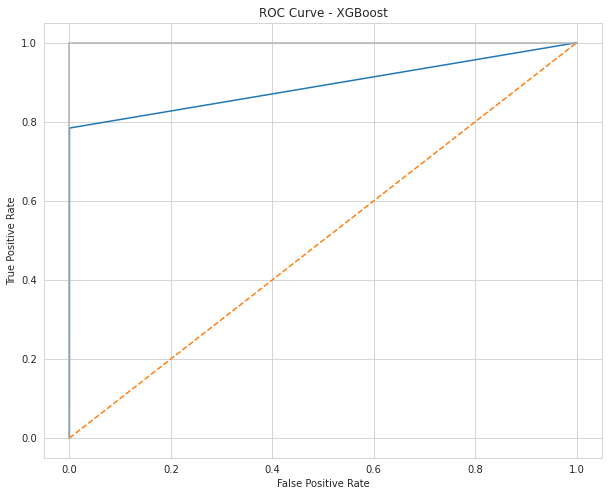

In [ ]:
plt.subplots(1, figsize=(10,8))   
plt.title('ROC Curve - XGBoost')
plt.plot(fpr4, tpr4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("True Positive  : ",xgcnf[0][0])
print("False Positive : ",xgcnf[0][1])
print("False Negative : ",xgcnf[1][0])
print("True Negative  : ",xgcnf[1][1])

True Positive  :  56870
False Positive :  4
False Negative :  19
True Negative  :  69


**From XGBoost we found that**

1. Precision Score = 94.52%

2. Recall Score = 78.41%

3. Roc_Auc Score = 89.20%

4. F1 - score = 86%

<Figure size 720x576 with 0 Axes>

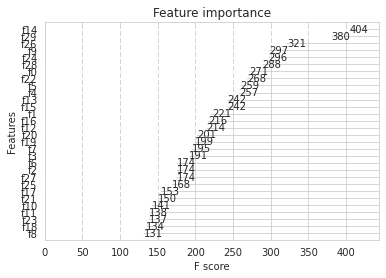

In [ ]:
plt.figure(figsize=(10,8))  
xgb.plot_importance(xg)